# Finding unusual events
- Anomaly detection algorithms look at an unlabeled dataset of normal events and thereby learns to detect or to raise a red flag for it there is an unusual or an anomalous event.
- 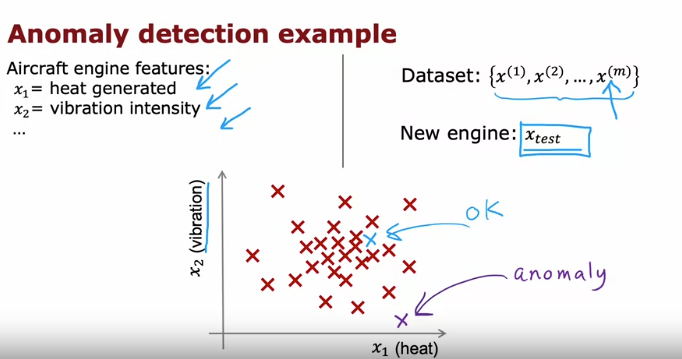
- The most common way to carry out anomaly detection is through a technique called density estimation. This means, when we're given our training sets of these m examples, the first thing we do is build a model for the probability of x. In other words, the learning algorithm will try to figure out what are the values of the features x1 and x2 that have high proabability and what are the valuers that are less likely or have a lower chance or lower probability of being seen in the data set.
    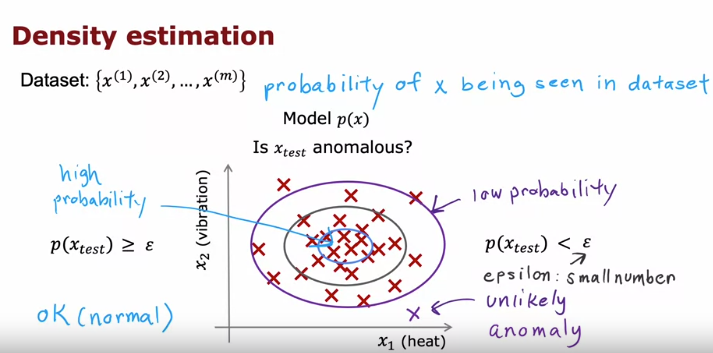
- Algorithms like this are routinely used to try to find unusual or maybe slightly suspicious activity.
- 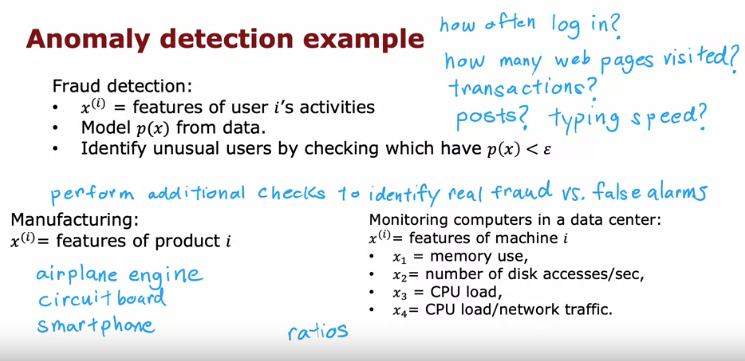
- Inorder to get anonymous detection algorithms to work, we'll need to use a Gaussian distribution to model the data p(x).

# Gaussian (normal) Detection
- Say x is a number, and if x is a random number, sometimes called the random variable, x can take on random values. If the probability of x is given by a Guassian or normal distribution with means paramater mu and with the variance.
- 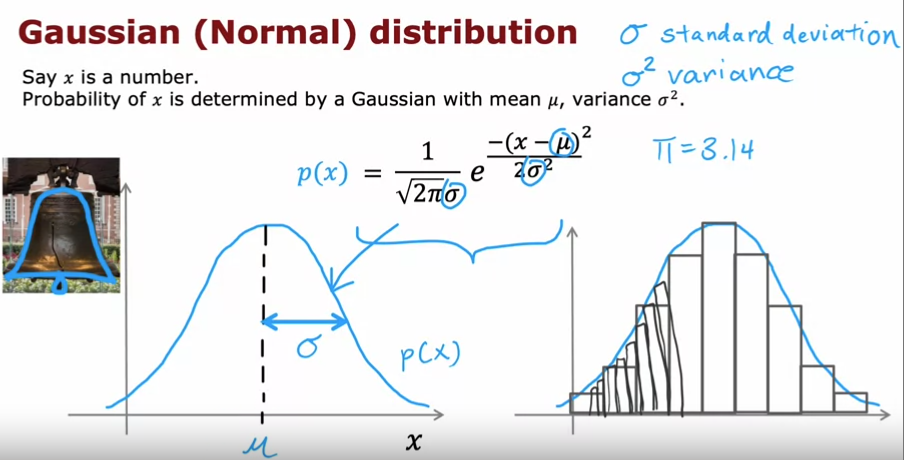
- The probability always have to sum up to one, so that's why the area under the curve is always equal to 1, which is why when the Gaussioan distribution becomes skinnier.
- 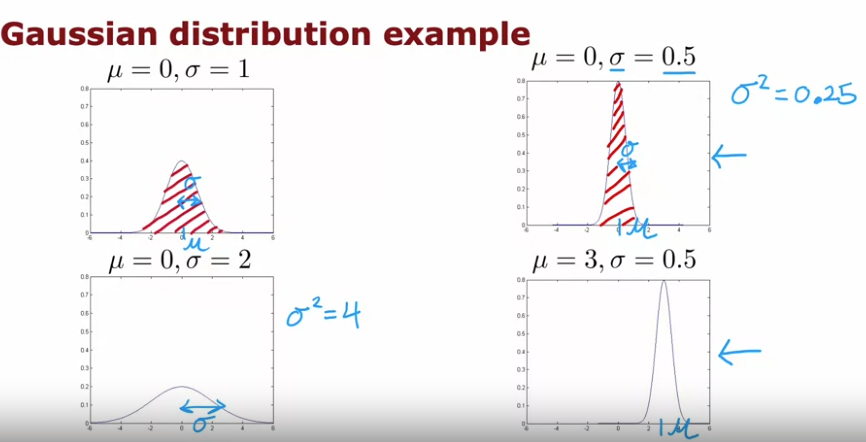
- When we're applying this to anomaly detection, here we are given a dataset of m examples. We have to try to estimate what a good choice is for the mean parameter Mu, as well as for the variance paramater sigma squared.
- 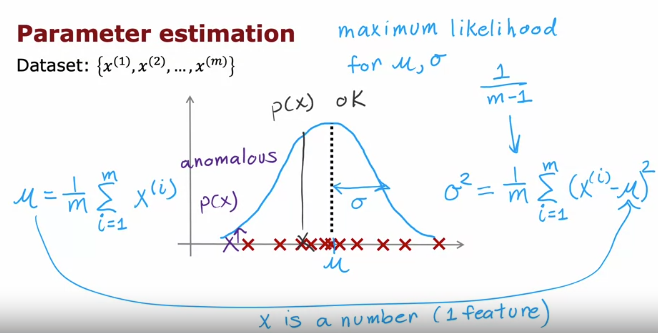

# Anomaly Detection Algorithm
- Given the training set, what we woulf like to do is to carry out density estimation and all that means is, we will build a model or estimate the probability for p(x).
- 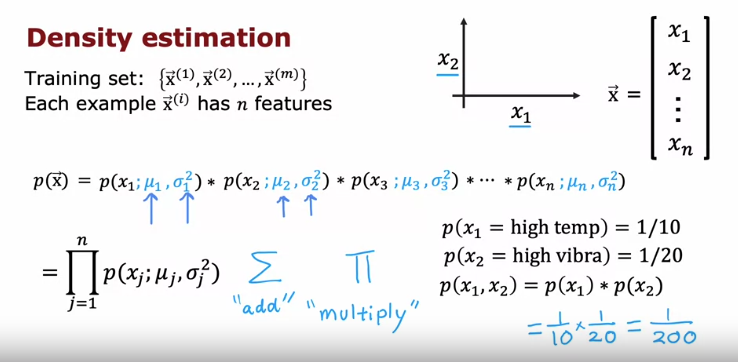
- Building the anomaly detection system
    1. To choose features x_i that we think might be indicative of anomalous examples. So coming up with the features we want to use.
    2. We would fit the parameter Mu_1 through Mu_n and sigma^2_1 through sigma^2_n for the n features in our dataset.
    3. Finally, when given a new example x_test, what we would do is compute p(x_test) and see if it's large or small.
    4. The final step is to see a p(x_test) is less than epsilon and if it is then we flag that it is an anomaly.
    - 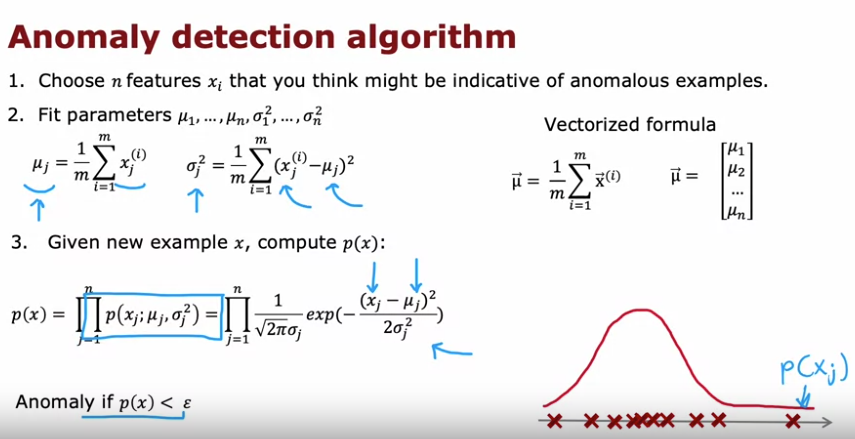
    - One intuition behind what this algorithm is doing is that it will tend to flag an examples as anomalous if 1 or more of the features are either very large or very small relative to what it has seen in the training set. So for each of the efatrues x_j, we're fitting a Guassian distribution. And so if even 1 of the features of the new examples was way out, then p(x_j) would be very small. When we multiple a small value then the it will tend to be very small and does P(x) becomes small.
- Anomaly detection is a systematic way of quantifying whether or not the new example x has any feature that are unusually large or unusually small.
- Let's take a look at what all actually means on 1 example, with features x_1 and x_2
    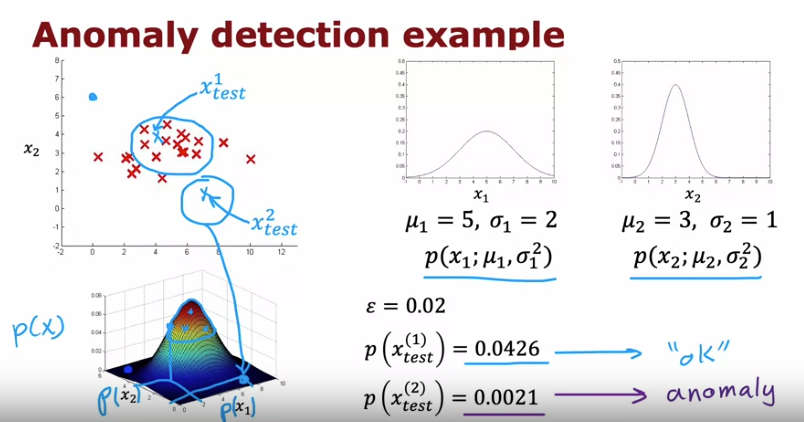

# Developing and evaluating an anomaly detection system
- When we are developing a learning algorithm,(choosing different features or trying different values of parameters like epsilon), making decisions about whether or not to change a feature in a certain way or to increase or decrease epsilon or other parameters, making those decisions is much easier is we have a way of evaluatiion the learing algorithm. This is also called real number evaluation, meaning that if we can quickly change the algorithm in some way, such as change a feature or change a parameter and have a way of computing a number that tell us if the algorithm got better or worse, then it makes it much easier to decide whether or not to stick with the change to the algorithm.
- 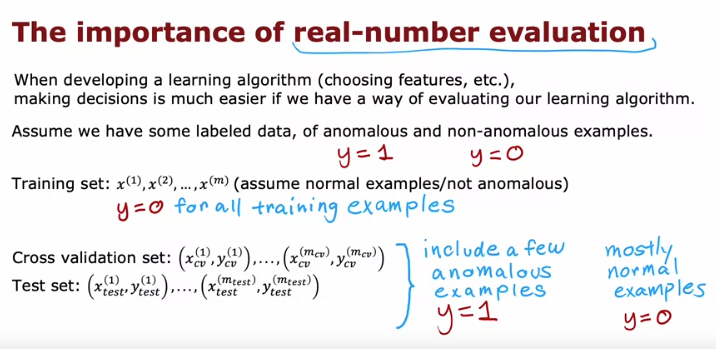
- 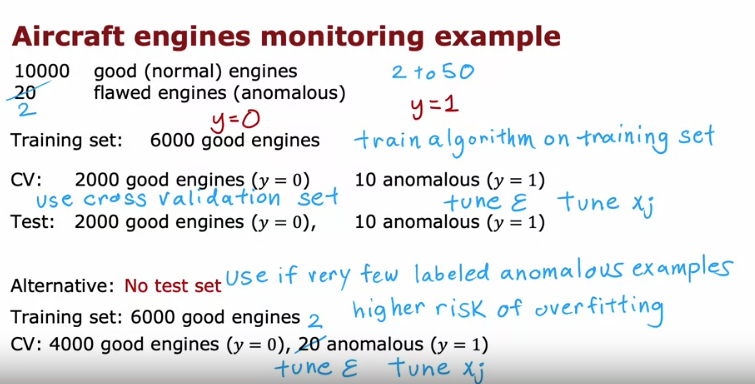
- 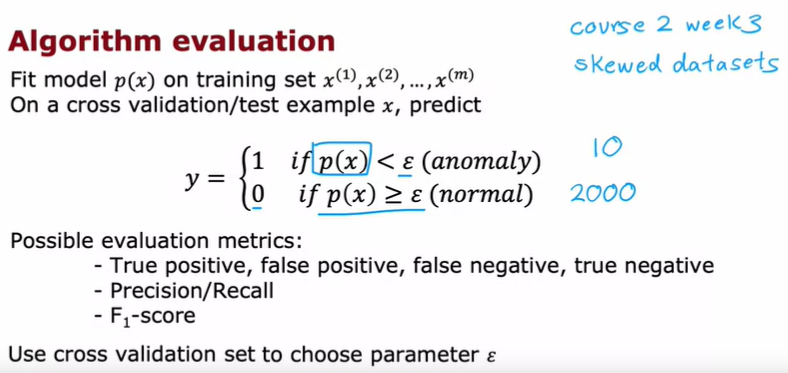
- When our data distribution is very skewed, we can use the possible evalution metrics:
    - True positive, False positive, False negative, true negative
    - Precision/Recall
    - F1 score
- The intution we get is to use the cross-validation set to just look at how many anomalies is finding. Then to just use that to try choose a good choice for the parameter Epsilon.

# Anomaly detection vs Supervised Learning
- When we have a few positive examples with y =1 and a large number of neagtive examples say y = 0? when should we use anomaly detection and when should we use supervised learning?
- An anomaly detection algorithm will typically be the more appropriate choice when we have a very small number of positive examples, say 0-20 positive examples is not uncommon.
- 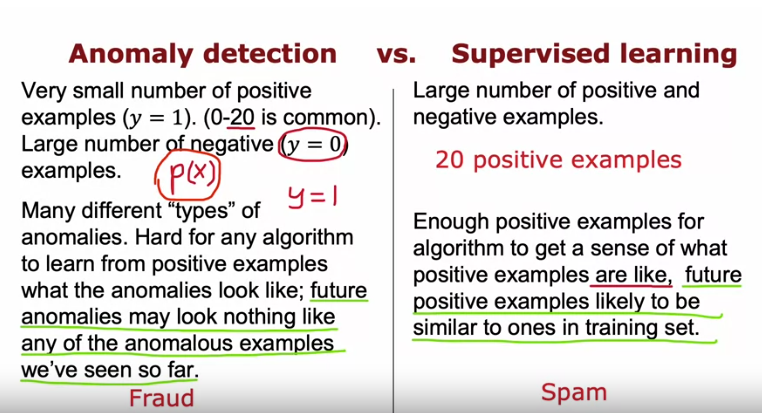
- If we are using a system to find financial fraud. There are many different ways unfortunately that some individuals are trying to commit finacial fraud. And unfortunately there are new types of financial fraud to commit financial fraud. And unfortunately there are new types of financial fraud attempts every few months or every year. And what that means is that because they keep on popping up completely new. And unique forms of financial fraud anomaly detection is often used to just look for anything that's different, then transactions we've seen in the past. 
- In contrast, if we look at the problem of email spam detection, well, there are many different types of spam email, but even over many years. Spam emails keep on trying to sell similar things or get us to go to similar websites and so on. Spam email that we will get in the next few days is much more likely to be similar to spam emails that we have seen in the past. So supervised learning algoerithm works wwell for spam becuase it's trying to detect more of the types of spam emails that we have probably seen in the past in our trainin set. Where as if we're trying to detect brand new types of fraud that have never seen before, then anomaly detection maybe more applicable.
- 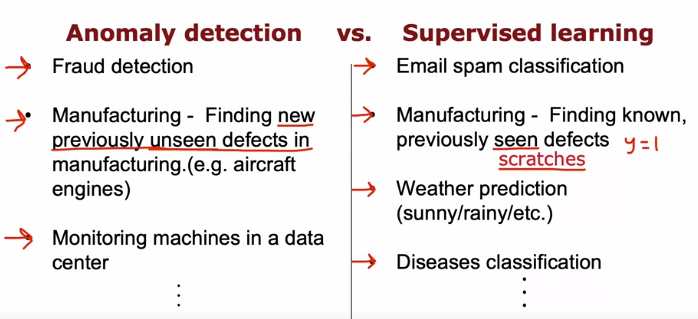

# Choosing what features to use
- When building an anomaly detection algorithm, choosing a good choice of features out to be really important.
- In supervised learning, if we don't have the features quite right, or if we have a few extra features that are not relevant to the problem, that often turns out to be okay. Because the algorithm has to supervised signal that is enough labels why for the algorithm to figure our what features ignores, or how to rescale features and to take the best advantage of the features we do give it.
- But for anomaly detection which runs, or learns just from unlabeled data, is harder for the algorithm to figure out what features to ignore.
- One step that can help our anomaly detetion algorithm, is to try make sure the features we give it are more or less Gaussian. And if the features are no Gaussian, sometimes we can change it to make it a little bit more Gaussian.
- if we have a feature X, we will often plot a histogram of the feature 
    - If the distributiin is Gaussian (bell shape), that feature would be a good candiadate feature.
    - If the distribution is non-Guassaian, We could take the feature X, and transform it in order to make a more Gaussian.
    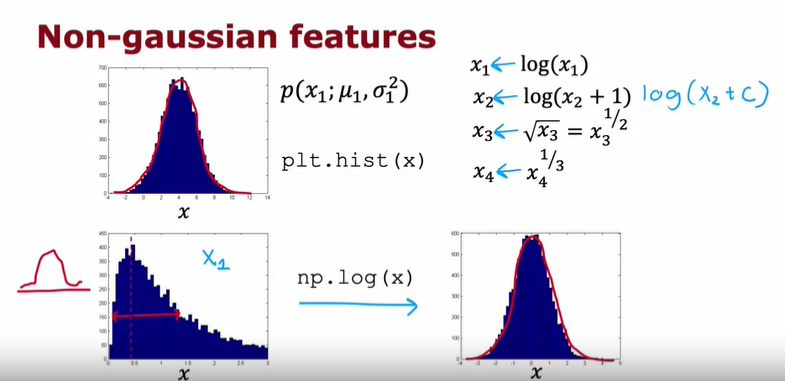
- Whatever transformation we apply to the training set, remember to apply the same transformation to out cross validation and test set data as well.
- After we've trained our anomaly detection algorithm, if it doesn't work that well on our cross valdiation set, we can also carry out an error analysis process for anomaly detection. In other words, we can try to look at where the algorithm is not yet doing well whereas making errors, and then use that to try to come up with improvements. 
- When we've learned the model p(x) from our unlabaled data, the most common problem that we may run into is that p(x) is comparable in values say is large for both normal and for anomalous examples.
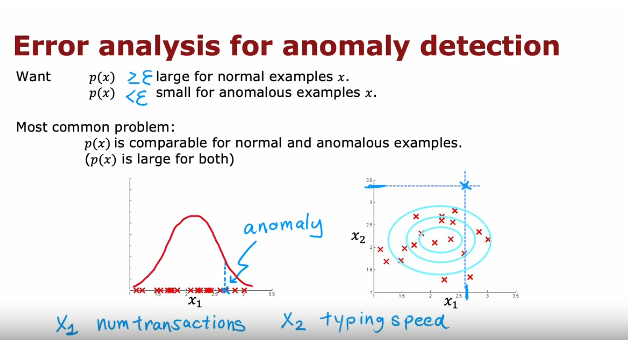
- The development process will often go through is, to train the model and then to see what anomalies in the cross validation set the algorithm is failing to detect. And then to look at those examples to see if that can inspire the creation of new features that would allow the algorithm to spot. That example takes on unsually large or unusually small values on the new features, so that we can now successfully flag those exampls as anomalies.
- 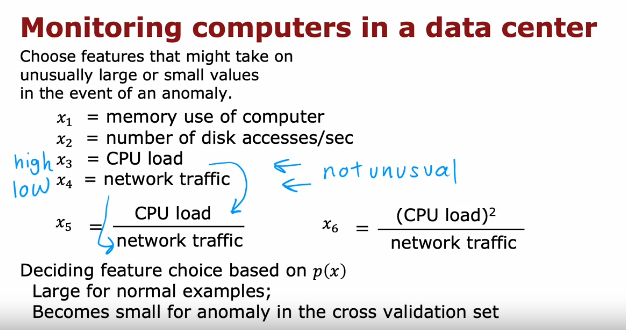

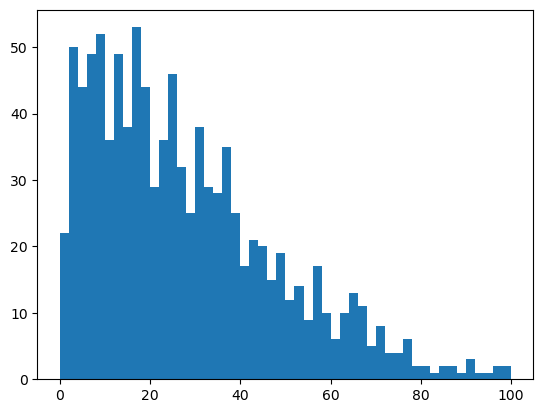

In [6]:
# Make skewed dataset
from scipy.stats import skewnorm
import matplotlib.pyplot as plt

numValues = 1000
maxValues = 100
skewness = 20  # Negative values are left skewed, positive values are right skewed.

random = skewnorm.rvs(a = skewness, loc=maxValues, size= numValues)

random = random - min(random) # shift the set so the minimum value is equal to zero
random = random / max(random) # Standardize all the values b/w 0 and 1.
random = random * maxValues # Multiply the standardized values by the maximum values

x = random

# Plot the histogram to check skewness
plt.hist(x, bins=50);

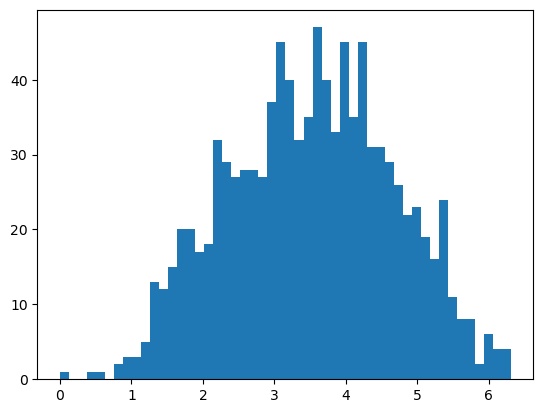

In [7]:
plt.hist(x**0.4, bins=50);

<IPython.core.display.Javascript object>

(array([ 3.,  2.,  5.,  5., 12., 10., 17., 13., 16., 19.,  9., 17., 13.,
        24., 25., 22., 18., 19., 23., 29., 17., 28., 33., 28., 35., 24.,
        26., 36., 39., 24., 35., 33., 32., 40., 30., 22., 31., 24., 24.,
        22., 23., 14., 22., 16., 14.,  8.,  5.,  5.,  4.,  5.]),
 array([1.94591015, 2.00044852, 2.0549869 , 2.10952527, 2.16406364,
        2.21860202, 2.27314039, 2.32767877, 2.38221714, 2.43675551,
        2.49129389, 2.54583226, 2.60037063, 2.65490901, 2.70944738,
        2.76398575, 2.81852413, 2.8730625 , 2.92760088, 2.98213925,
        3.03667762, 3.091216  , 3.14575437, 3.20029274, 3.25483112,
        3.30936949, 3.36390787, 3.41844624, 3.47298461, 3.52752299,
        3.58206136, 3.63659973, 3.69113811, 3.74567648, 3.80021486,
        3.85475323, 3.9092916 , 3.96382998, 4.01836835, 4.07290672,
        4.1274451 , 4.18198347, 4.23652184, 4.29106022, 4.34559859,
        4.40013697, 4.45467534, 4.50921371, 4.56375209, 4.61829046,
        4.67282883]),
 <BarContainer

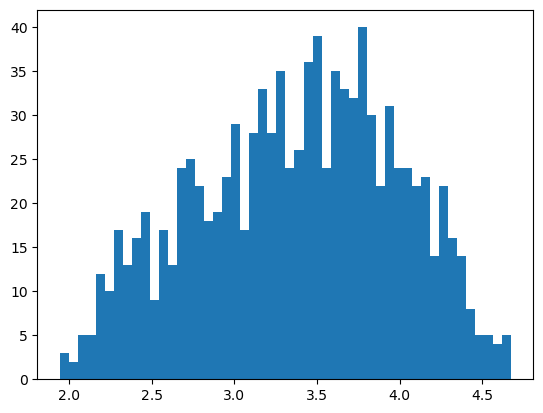

In [13]:
plt.hist(np.log(x + 7), bins = 50)